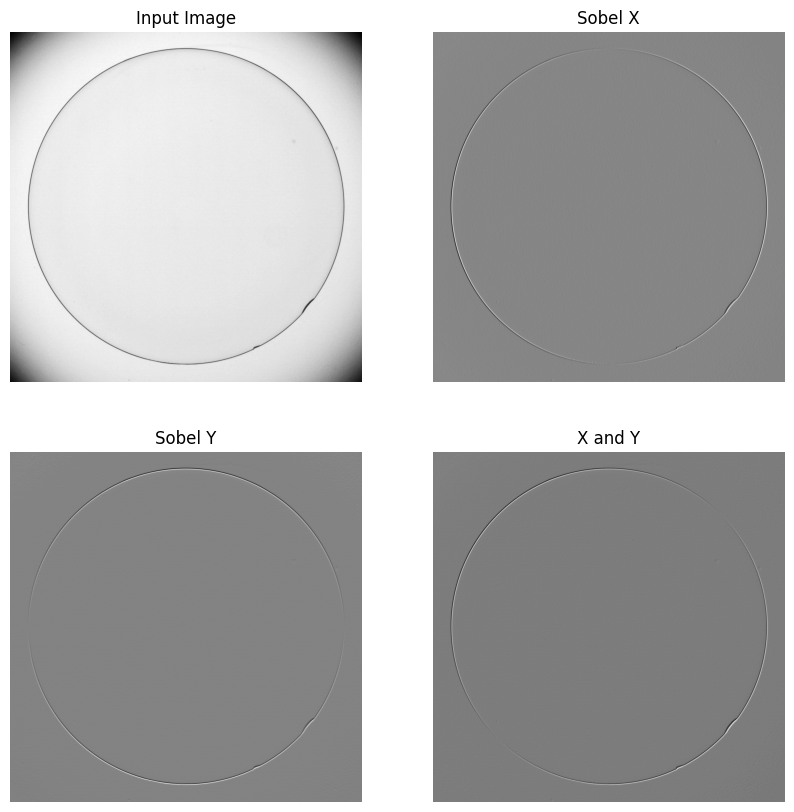

In [2]:
#Assingment 2
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('contact_lens.tif', cv2.IMREAD_GRAYSCALE)


sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)

sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(sobelxy, cmap='gray')
plt.title('X and Y')
plt.axis('off')
plt.show()


In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('contact_lens.tif')


# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to remove noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the image to isolate the lens
_, thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

# Perform morphological closing to fill any holes
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find the contours in the image
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour as the lens
max_contour = max(contours, key=cv2.contourArea)

# Find the minimum enclosing circle of the lens contour
((x, y), radius) = cv2.minEnclosingCircle(max_contour)

# Draw the circle on the original image
cv2.circle(img, (int(x), int(y)), int(radius), (0, 255, 0), 2)

# Display the image
cv2.imshow("Result", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Calculate and print the diameter of the lens
diameter = round(radius * 2, 2)
print("The diameter of the lens is:", diameter)


In [ ]:
import cv2
import numpy as np

# Read image
img = cv2.imread('contact_lens.tif', cv2.IMREAD_GRAYSCALE)

# Blur image to reduce noise
img_blur = cv2.medianBlur(img, 5)

# Detect circles using Hough Circle Transform
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, dp=1, minDist=50,
                           param1=100, param2=30, minRadius=0, maxRadius=0)

# Draw detected circles
if circles is not None:
    circles = np.round(circles[0, :]).astype('int')
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img, (x, y), 2, (0, 0, 255), 3)

        # Print circle center and radius
        print(f'Center: ({x}, {y}), Radius: {r}')

# Show image
cv2.imshow('Detected Circles', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


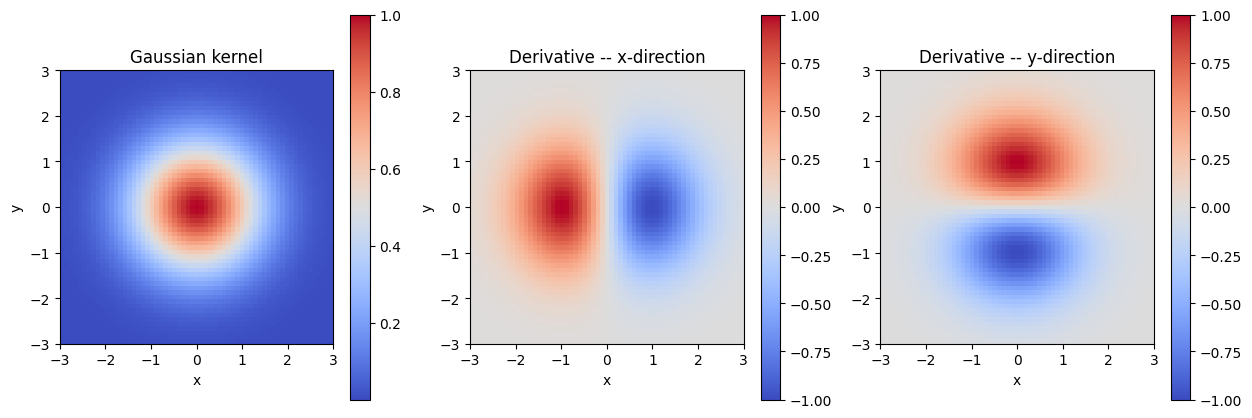

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain of the kernel
x = np.arange(-3, 3.1, 0.1)
y = np.arange(-3, 3.1, 0.1)
xx, yy = np.meshgrid(x, y)

# Define the standard deviation of the Gaussian kernel
sigma = 1

# Compute the Gaussian kernel
kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

# Compute the derivative of the Gaussian kernel in the x-direction
dx_kernel = -xx / (sigma**2) * kernel

# Compute the derivative of the Gaussian kernel in the y-direction
dy_kernel = -yy / (sigma**2) * kernel

# Normalize the kernel for display
kernel /= np.max(kernel)
dx_kernel /= np.max(np.abs(dx_kernel))
dy_kernel /= np.max(np.abs(dy_kernel))

# Plot the kernels
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
im1 = ax[0].imshow(kernel, cmap='coolwarm', extent=(-3, 3, -3, 3))
ax[0].set_title('Gaussian kernel')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
fig.colorbar(im1, ax=ax[0])
im2 = ax[1].imshow(dx_kernel, cmap='coolwarm', extent=(-3, 3, -3, 3))
ax[1].set_title('Derivative -- x-direction')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
fig.colorbar(im2, ax=ax[1])
im3 = ax[2].imshow(dy_kernel, cmap='coolwarm', extent=(-3, 3, -3, 3))
ax[2].set_title('Derivative -- y-direction')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
fig.colorbar(im3, ax=ax[2])
plt.show()


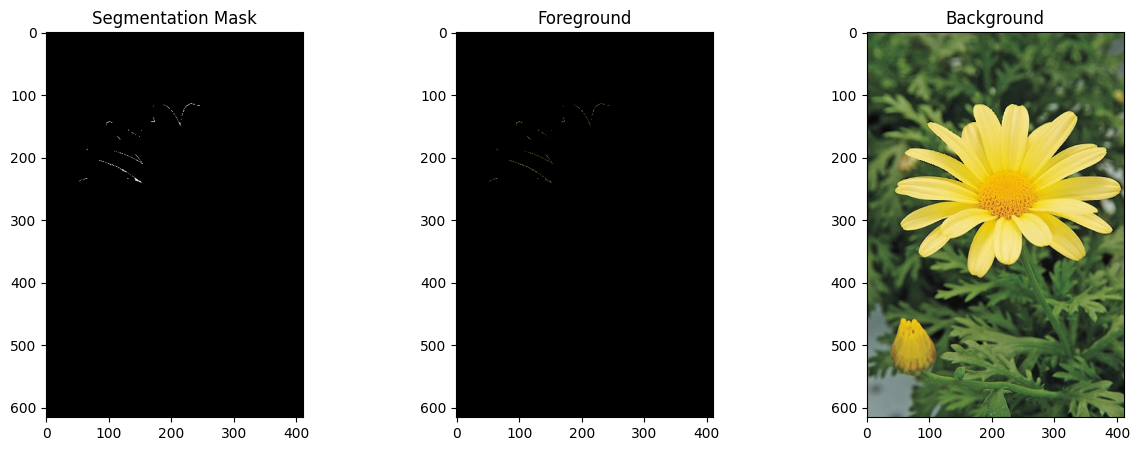

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread('daisy.jpg')

# Define the bounding rectangle of the object to be segmented
rect = (50, 50, 200, 200)

# Initialize the segmentation mask
mask = np.zeros(img.shape[:2], np.uint8)

# Set the pixels inside the bounding rectangle as probable foreground
# (1) and the pixels outside the rectangle as probable background (0)
cv2.grabCut(img, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

# Create a binary mask where the probable foreground (1) and the
# definite foreground (3) are combined
mask2 = np.where((mask == 1) | (mask == 3), 255, 0).astype('uint8')

# Apply the mask to the input image to get the foreground
foreground = cv2.bitwise_and(img, img, mask=mask2)

# Get the background by subtracting the foreground from the input image
background = cv2.subtract(img, foreground)

# Show the final segmentation mask, foreground image, and background image
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(mask2, cmap='gray')
ax[0].set_title('Segmentation Mask')
ax[1].imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
ax[1].set_title('Foreground')
ax[2].imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
ax[2].set_title('Background')
plt.show()


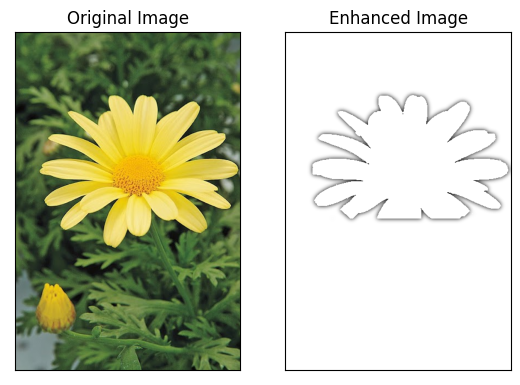

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('daisy.jpg')

# Create a mask with same size as the image, initialized to zeros
mask = np.zeros(img.shape[:2],np.uint8)

# Specify the region of interest (ROI) to be segmented
rect = (50,50,450,290)

# Run the grabCut algorithm
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

# Extract the foreground and background
foreground = np.where((mask==1) + (mask==3), 255, 0).astype('uint8')
background = np.where((mask==0) + (mask==2), 255, 0).astype('uint8')

# Apply a Gaussian blur to the background
blur = cv2.GaussianBlur(background, (25, 25), 0)

# Combine the foreground and blurred background
result = cv2.bitwise_or(foreground, blur)

# Show the original and enhanced images side by side
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result, cmap='gray')
plt.title('Enhanced Image'), plt.xticks([]), plt.yticks([])
plt.show()


In [9]:

import numpy as np
import cv2

# Set the sigma values
sigma1 = 1
sigma2 = 3

# Create a range of coordinates from -5 to 5
x = np.arange(-5, 6)
y = np.arange(-5, 6)

# Compute the derivative of Gaussian kernels for sigma1
dx1 = -x * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)
dy1 = -y * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)

# Compute the derivative of Gaussian kernels for sigma2
dx2 = -x * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)
dy2 = -y * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)

# Display the kernels
print("dx1:\n", dx1)
print("\ndy1:\n", dy1)
print("\ndx2:\n", dx2)
print("\ndy2:\n", dy2)


dx1:
 [ 1.10516746e-11  7.16421173e-08  5.89238410e-05  5.83004893e-03
  5.85498315e-02  0.00000000e+00 -5.85498315e-02 -5.83004893e-03
 -5.89238410e-05 -7.16421173e-08 -1.10516746e-11]

dy1:
 [ 1.10516746e-11  7.16421173e-08  5.89238410e-05  5.83004893e-03
  5.85498315e-02  0.00000000e+00 -5.85498315e-02 -5.83004893e-03
 -5.89238410e-05 -7.16421173e-08 -1.10516746e-11]

dx2:
 [ 0.00061085  0.00132836  0.00216851  0.00251968  0.00175825  0.
 -0.00175825 -0.00251968 -0.00216851 -0.00132836 -0.00061085]

dy2:
 [ 0.00061085  0.00132836  0.00216851  0.00251968  0.00175825  0.
 -0.00175825 -0.00251968 -0.00216851 -0.00132836 -0.00061085]


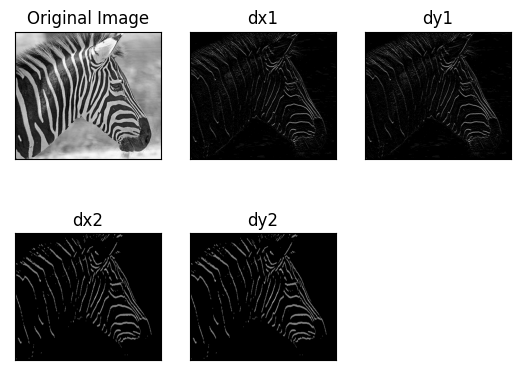

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread('zebrahead.jpg', 0)

# Set the sigma values
sigma1 = 1
sigma2 = 3

# Create a range of coordinates from -5 to 5
x = np.arange(-5, 6)
y = np.arange(-5, 6)

# Compute the derivative of Gaussian kernels for sigma1
dx1 = -x * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)
dy1 = -y * np.exp(-(x**2 + y**2)/(2*sigma1**2)) / (2*np.pi*sigma1**4)

# Compute the derivative of Gaussian kernels for sigma2
dx2 = -x * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)
dy2 = -y * np.exp(-(x**2 + y**2)/(2*sigma2**2)) / (2*np.pi*sigma2**4)

# Apply the derivative of Gaussian kernels to the image
dx1_img = cv2.filter2D(img, -1, dx1)
dy1_img = cv2.filter2D(img, -1, dy1)
dx2_img = cv2.filter2D(img, -1, dx2)
dy2_img = cv2.filter2D(img, -1, dy2)

# Display the original and derivative images side by side
plt.subplot(231),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dx1_img, cmap='gray')
plt.title('dx1'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(dy1_img, cmap='gray')
plt.title('dy1'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(dx2_img, cmap='gray')
plt.title('dx2'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(dy2_img, cmap='gray')
plt.title('dy2'), plt.xticks([]), plt.yticks([])
plt.show()


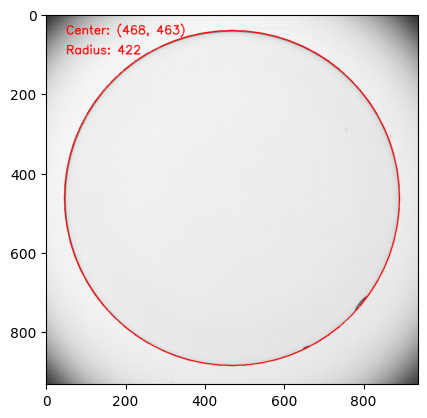

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('contact_lens.tif')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 15)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw circle around the edge of the contact lens
(x,y), radius = cv2.minEnclosingCircle(contours[0])
cv2.circle(img, (int(x),int(y)), int(radius), (0,255,0), 2)

# Find center and diameter of the contact lens
center, diameter = (int(x),int(y)), int(radius*2)

# Draw circle with center and diameter
cv2.circle(img, center, diameter//2, (0,0,255), 2)

# Mark center and radius with text
cv2.putText(img, 'Center: '+str(center), (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
cv2.putText(img, 'Radius: '+str(diameter//2), (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

# Resize image to fit window
cv2.namedWindow('Contact Lens', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Contact Lens', 800, 600)

# Plot the image with circles and text
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
